### This file summarises the results of the example wells (Figures 5~7 and Table 3).

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import matplotlib as mpl
mpl.rcParams['font.serif'] = ['Tahoma']

pd.options.mode.chained_assignment = None

# Get the current directory.
current_dir = os.getcwd()

### Figure 5: Example well A

Metrics for example well A in Table 3 can be derived from `/Reproduction/Analysis-SA/SA-M/M200/Metrics-133.xlsx`, in the row corresponding to well name 17-P02W3.

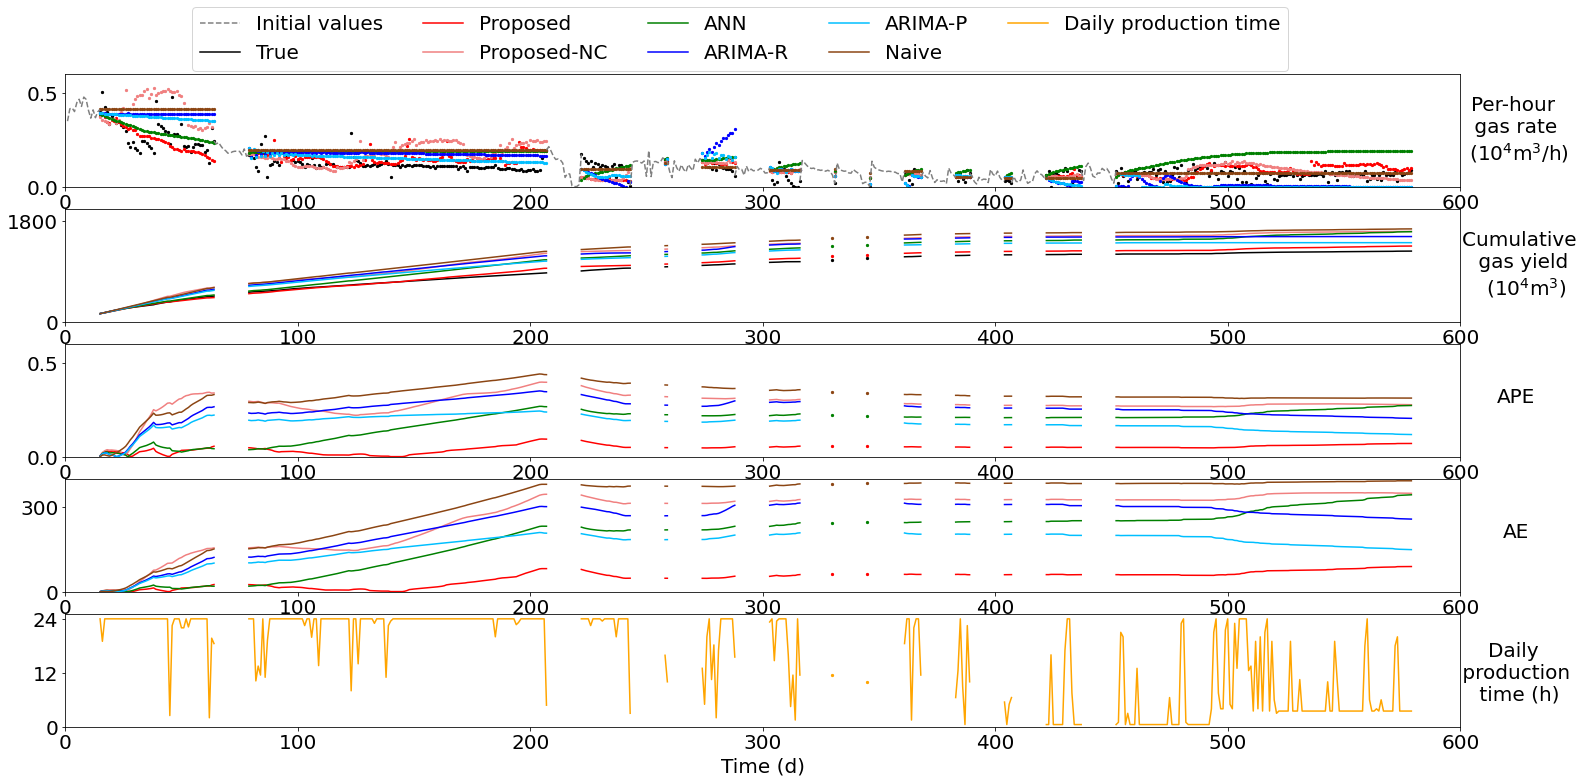

In [2]:
for rs in [133]:
    path_proposed = current_dir+'/Results/SA/'+str(rs)+'/'+str(rs)+'-ResultData-M200/'
    files_proposed = sorted(os.listdir(path_proposed))

    path_proposednc = current_dir+'/Results/ProposedNC/'+str(rs)+'-ResultData/'
    files_proposednc = sorted(os.listdir(path_proposednc))

    path_ann = current_dir+'/Results/ANN/'+str(rs)+'-ResultData/'
    files_ann = sorted(os.listdir(path_ann))

    path_arimar = current_dir+'/Results/ARIMAR/'+str(rs)+'-ResultData/'
    files_arimar = sorted(os.listdir(path_arimar))

    path_arimap = current_dir+'/Results/ARIMAP/'+str(rs)+'-ResultData/'
    files_arimap = sorted(os.listdir(path_arimap))

    path_naive = current_dir+'/Results/Naive/'+str(rs)+'-ResultData/'
    files_naive = sorted(os.listdir(path_naive))

    for i in [9]:
        df_proposed = pd.read_excel(path_proposed+files_proposed[i], header=0, sheet_name = 0)
        df_proposednc = pd.read_excel(path_proposednc+files_proposednc[i], header=0, sheet_name = 0)
        df_ann = pd.read_excel(path_ann+files_ann[i], header=0, sheet_name = 0)
        df_arimar = pd.read_excel(path_arimar+files_arimar[i], header=0, sheet_name = 0)
        df_arimap = pd.read_excel(path_arimap+files_arimap[i], header=0, sheet_name = 0)
        df_naive = pd.read_excel(path_naive+files_naive[i], header=0, sheet_name = 0)

        result_1 = pd.DataFrame()
        result_2 = pd.DataFrame()

        result_1['Mark'] = df_proposed['Mark']
        result_1['True1'] = df_proposed['True']
        result_1['Proposed1'] = df_proposed['Pred']
        result_1['ProposedNC1'] = df_proposednc['Pred']
        result_1['ANN1'] = df_ann['Pred']
        result_1['ARIMAR1'] = df_arimar['Pred']
        result_1['ARIMAP1'] = df_arimap['Pred']
        result_1['Naive1'] = df_naive['Pred']
        result_1['True2'] = df_proposed['TrueCumu']
        result_1['Proposed2'] = df_proposed['PredCumu']
        result_1['ProposedNC2'] = df_proposednc['PredCumu']
        result_1['ANN2'] = df_ann['PredCumu']
        result_1['ARIMAR2'] = df_arimar['PredCumu']
        result_1['ARIMAP2'] = df_arimap['PredCumu']
        result_1['Naive2'] = df_naive['PredCumu']
        result_1['Proposed3'] = abs(result_1['Proposed2']-result_1['True2'])/result_1['True2']
        result_1['ProposedNC3'] = abs(result_1['ProposedNC2']-result_1['True2'])/result_1['True2']
        result_1['ANN3'] = abs(result_1['ANN2']-result_1['True2'])/result_1['True2']
        result_1['ARIMAR3'] = abs(result_1['ARIMAR2']-result_1['True2'])/result_1['True2']
        result_1['ARIMAP3'] = abs(result_1['ARIMAP2']-result_1['True2'])/result_1['True2']
        result_1['Naive3'] = abs(result_1['Naive2']-result_1['True2'])/result_1['True2']
        result_1['Proposed4'] = abs(result_1['Proposed2']-result_1['True2'])
        result_1['ProposedNC4'] = abs(result_1['ProposedNC2']-result_1['True2'])
        result_1['ANN4'] = abs(result_1['ANN2']-result_1['True2'])
        result_1['ARIMAR4'] = abs(result_1['ARIMAR2']-result_1['True2'])
        result_1['ARIMAP4'] = abs(result_1['ARIMAP2']-result_1['True2'])
        result_1['Naive4'] = abs(result_1['Naive2']-result_1['True2'])
        result_1['t'] = df_proposed['t']
        result_1.loc[result_1['Mark']=='initial',['True1', 'Proposed1', 'ProposedNC1', 'ANN1', 'ARIMAR1', 'ARIMAP1', 'Naive1', 
                                                'True2', 'Proposed2', 'ProposedNC2', 'ANN2', 'ARIMAR2', 'ARIMAP2', 'Naive2', 
                                                'Proposed3', 'ProposedNC3', 'ANN3', 'ARIMAR3', 'ARIMAP3', 'Naive3', 
                                                'Proposed4', 'ProposedNC4', 'ANN4', 'ARIMAR4', 'ARIMAP4', 'Naive4', 't']] = np.nan

        result_2['Mark'] = df_proposed['Mark']
        result_2['True1'] = df_proposed['True']
        result_2['True2'] = df_proposed['TrueCumu']
        for j in range(1,len(result_2)-1):
            if (result_2['Mark'][j-1]=='forecast') and (result_2['Mark'][j+1]=='forecast'):
                result_2['True1'][j] = np.nan
                result_2['True2'][j] = np.nan

        fig, (ax0, ax1, ax2, ax3, ax4) = plt.subplots(5, 1, figsize=(25,12))
        ax0.scatter(result_1.index+1, result_1['True1'], s=5, color='black')
        ax0.plot(result_1.index+1, result_2['True1'], linestyle='--', label='Initial values', color='grey')
        ax0.scatter(result_1.index+1, result_1['Proposed1'], s=5, color='red')
        ax0.scatter(result_1.index+1, result_1['ProposedNC1'], s=5, color='lightcoral')
        ax0.scatter(result_1.index+1, result_1['ANN1'], s=5, color='green')
        ax0.scatter(result_1.index+1, result_1['ARIMAR1'], s=5, color='blue')
        ax0.scatter(result_1.index+1, result_1['ARIMAP1'], s=5, color='deepskyblue')
        ax0.scatter(result_1.index+1, result_1['Naive1'], s=5, color='saddlebrown')

        ax1.plot(result_1.index+1, result_1['True2'], label='True', color='black')
        ax1.plot(result_1.index+1, result_1['Proposed2'], label='Proposed', color='red')
        ax1.plot(result_1.index+1, result_1['ProposedNC2'], label='Proposed-NC', color='lightcoral')
        ax1.plot(result_1.index+1, result_1['ANN2'], label='ANN', color='green')
        ax1.plot(result_1.index+1, result_1['ARIMAR2'], label='ARIMA-R', color='blue')
        ax1.plot(result_1.index+1, result_1['ARIMAP2'], label='ARIMA-P', color='deepskyblue')
        ax1.plot(result_1.index+1, result_1['Naive2'], label='Naive', color='saddlebrown')

        ax2.plot(result_1.index+1, result_1['Proposed3'], color='red')
        ax2.plot(result_1.index+1, result_1['ProposedNC3'], color='lightcoral')
        ax2.plot(result_1.index+1, result_1['ANN3'], color='green')
        ax2.plot(result_1.index+1, result_1['ARIMAR3'], color='blue')
        ax2.plot(result_1.index+1, result_1['ARIMAP3'], color='deepskyblue')
        ax2.plot(result_1.index+1, result_1['Naive3'], color='saddlebrown')

        ax3.plot(result_1.index+1, result_1['Proposed4'], color='red')
        ax3.plot(result_1.index+1, result_1['ProposedNC4'], color='lightcoral')
        ax3.plot(result_1.index+1, result_1['ANN4'], color='green')
        ax3.plot(result_1.index+1, result_1['ARIMAR4'], color='blue')
        ax3.plot(result_1.index+1, result_1['ARIMAP4'], color='deepskyblue')
        ax3.plot(result_1.index+1, result_1['Naive4'], color='saddlebrown')

        ax4.plot(result_1.index+1, result_1['t'], label='Daily production time', color='orange')

        ax1.scatter([330,345], [result_1['True2'][330],result_1['True2'][345]], s=5, color='black')
        ax1.scatter([330,345], [result_1['Proposed2'][330],result_1['Proposed2'][345]], s=5, color='red')
        ax1.scatter([330,345], [result_1['ANN2'][330],result_1['ANN2'][345]], s=5, color='green')
        ax1.scatter([330,345], [result_1['Naive2'][330],result_1['Naive2'][345]], s=5, color='saddlebrown')

        ax2.scatter([330,345], [result_1['Proposed3'][330],result_1['Proposed3'][345]], s=5, color='red')
        ax2.scatter([330,345], [result_1['ANN3'][330],result_1['ANN3'][345]], s=5, color='green')
        ax2.scatter([330,345], [result_1['Naive3'][330],result_1['Naive3'][345]], s=5, color='saddlebrown')

        ax3.scatter([330,345], [result_1['Proposed4'][330],result_1['Proposed4'][345]], s=5, color='red')
        ax3.scatter([330,345], [result_1['ANN4'][330],result_1['ANN4'][345]], s=5, color='green')
        ax3.scatter([330,345], [result_1['Naive4'][330],result_1['Naive4'][345]], s=5, color='saddlebrown')

        ax4.scatter([330,345], [result_1['t'][330],result_1['t'][345]], s=5, color='orange')
        
        ax0.set_ylabel('Per-hour \n gas rate \n ($10^4$m$^3/$h)', fontsize=20, rotation=0)
        ax0.get_yaxis().set_label_coords(1.04,0.2)
        ax1.set_ylabel('Cumulative \n gas yield \n ($10^4$m$^3$)', fontsize=20, rotation=0)
        ax1.get_yaxis().set_label_coords(1.045,0.2)
        ax2.set_ylabel('APE', fontsize=20, rotation=0)
        ax2.get_yaxis().set_label_coords(1.04,0.45)
        ax3.set_ylabel('AE', fontsize=20, rotation=0)
        ax3.get_yaxis().set_label_coords(1.04,0.45)
        ax4.set_ylabel('Daily \n production \n time (h)', fontsize=20, rotation=0)
        ax4.get_yaxis().set_label_coords(1.04,0.2)
        ax4.set_xlabel('Time (d)', fontsize=20)

        length = 600
        ax0.set_xlim(0,length)
        ax1.set_xlim(0,length)
        ax3.set_xlim(0,length)
        ax2.set_xlim(0,length)
        ax4.set_xlim(0,length)

        ax0.set_ylim(0,0.6)
        ax1.set_ylim(0,2000)
        ax1.set_yticks((0, 1800))
        ax2.set_ylim(0,0.6)
        ax3.set_ylim(0,400)
        ax3.set_yticks((0, 300))
        ax4.set_ylim(0,25)
        ax4.set_yticks((0, 12, 24))

        ax0.tick_params(labelsize=20)
        ax1.tick_params(labelsize=20)
        ax2.tick_params(labelsize=20)
        ax3.tick_params(labelsize=20)
        ax4.tick_params(labelsize=20)

        fig.legend(loc='upper center', bbox_to_anchor=(0.5, 0.97), ncol=5, fontsize=20)
        plt.savefig(current_dir+'/Figures/Figure_5.png', bbox_inches='tight')

### Figure 6: Example well B

Metrics for example well B in Table 3 can be derived from `/Reproduction/Analysis-SA/SA-M/M200/Metrics-135.xlsx`, in the row corresponding to well name 27-P60W3.

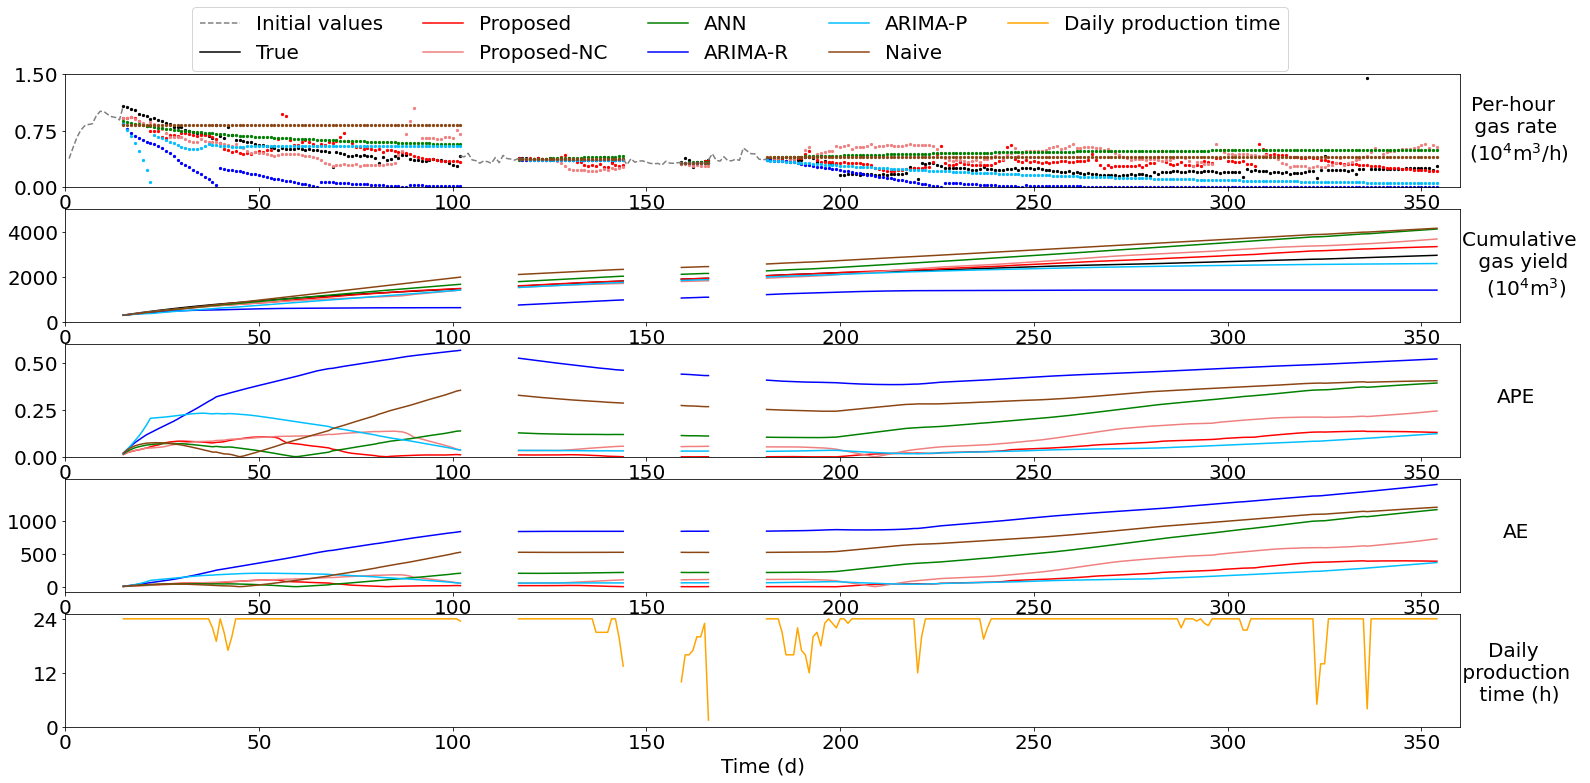

In [3]:
for rs in [135]:
    path_proposed = current_dir+'/Results/SA/'+str(rs)+'/'+str(rs)+'-ResultData-M200/'
    files_proposed = sorted(os.listdir(path_proposed))

    path_proposednc = current_dir+'/Results/ProposedNC/'+str(rs)+'-ResultData/'
    files_proposednc = sorted(os.listdir(path_proposednc))

    path_ann = current_dir+'/Results/ANN/'+str(rs)+'-ResultData/'
    files_ann = sorted(os.listdir(path_ann))

    path_arimar = current_dir+'/Results/ARIMAR/'+str(rs)+'-ResultData/'
    files_arimar = sorted(os.listdir(path_arimar))

    path_arimap = current_dir+'/Results/ARIMAP/'+str(rs)+'-ResultData/'
    files_arimap = sorted(os.listdir(path_arimap))

    path_naive = current_dir+'/Results/Naive/'+str(rs)+'-ResultData/'
    files_naive = sorted(os.listdir(path_naive))

    for i in [20]:
        df_proposed = pd.read_excel(path_proposed+files_proposed[i], header=0, sheet_name = 0)
        df_proposednc = pd.read_excel(path_proposednc+files_proposednc[i], header=0, sheet_name = 0)
        df_ann = pd.read_excel(path_ann+files_ann[i], header=0, sheet_name = 0)
        df_arimar = pd.read_excel(path_arimar+files_arimar[i], header=0, sheet_name = 0)
        df_arimap = pd.read_excel(path_arimap+files_arimap[i], header=0, sheet_name = 0)
        df_naive = pd.read_excel(path_naive+files_naive[i], header=0, sheet_name = 0)

        result_1 = pd.DataFrame()
        result_2 = pd.DataFrame()

        result_1['Mark'] = df_proposed['Mark']
        result_1['True1'] = df_proposed['True']
        result_1['Proposed1'] = df_proposed['Pred']
        result_1['ProposedNC1'] = df_proposednc['Pred']
        result_1['ANN1'] = df_ann['Pred']
        result_1['ARIMAR1'] = df_arimar['Pred']
        result_1['ARIMAP1'] = df_arimap['Pred']
        result_1['Naive1'] = df_naive['Pred']
        result_1['True2'] = df_proposed['TrueCumu']
        result_1['Proposed2'] = df_proposed['PredCumu']
        result_1['ProposedNC2'] = df_proposednc['PredCumu']
        result_1['ANN2'] = df_ann['PredCumu']
        result_1['ARIMAR2'] = df_arimar['PredCumu']
        result_1['ARIMAP2'] = df_arimap['PredCumu']
        result_1['Naive2'] = df_naive['PredCumu']
        result_1['Proposed3'] = abs(result_1['Proposed2']-result_1['True2'])/result_1['True2']
        result_1['ProposedNC3'] = abs(result_1['ProposedNC2']-result_1['True2'])/result_1['True2']
        result_1['ANN3'] = abs(result_1['ANN2']-result_1['True2'])/result_1['True2']
        result_1['ARIMAR3'] = abs(result_1['ARIMAR2']-result_1['True2'])/result_1['True2']
        result_1['ARIMAP3'] = abs(result_1['ARIMAP2']-result_1['True2'])/result_1['True2']
        result_1['Naive3'] = abs(result_1['Naive2']-result_1['True2'])/result_1['True2']
        result_1['Proposed4'] = abs(result_1['Proposed2']-result_1['True2'])
        result_1['ProposedNC4'] = abs(result_1['ProposedNC2']-result_1['True2'])
        result_1['ANN4'] = abs(result_1['ANN2']-result_1['True2'])
        result_1['ARIMAR4'] = abs(result_1['ARIMAR2']-result_1['True2'])
        result_1['ARIMAP4'] = abs(result_1['ARIMAP2']-result_1['True2'])
        result_1['Naive4'] = abs(result_1['Naive2']-result_1['True2'])
        result_1['t'] = df_proposed['t']
        result_1.loc[result_1['Mark']=='initial',['True1', 'Proposed1', 'ProposedNC1', 'ANN1', 'ARIMAR1', 'ARIMAP1', 'Naive1', 
                                                'True2', 'Proposed2', 'ProposedNC2', 'ANN2', 'ARIMAR2', 'ARIMAP2', 'Naive2', 
                                                'Proposed3', 'ProposedNC3', 'ANN3', 'ARIMAR3', 'ARIMAP3', 'Naive3', 
                                                'Proposed4', 'ProposedNC4', 'ANN4', 'ARIMAR4', 'ARIMAP4', 'Naive4', 't']] = np.nan

        result_2['Mark'] = df_proposed['Mark']
        result_2['True1'] = df_proposed['True']
        result_2['True2'] = df_proposed['TrueCumu']
        for j in range(1,len(result_2)-1):
            if (result_2['Mark'][j-1]=='forecast') and (result_2['Mark'][j+1]=='forecast'):
                result_2['True1'][j] = np.nan
                result_2['True2'][j] = np.nan

        fig, (ax0, ax1, ax2, ax3, ax4) = plt.subplots(5, 1, figsize=(25,12))
        ax0.scatter(result_1.index+1, result_1['True1'], s=5, color='black')
        ax0.plot(result_1.index+1, result_2['True1'], linestyle='--', label='Initial values', color='grey')
        ax0.scatter(result_1.index+1, result_1['Proposed1'], s=5, color='red')
        ax0.scatter(result_1.index+1, result_1['ProposedNC1'], s=5, color='lightcoral')
        ax0.scatter(result_1.index+1, result_1['ANN1'], s=5, color='green')
        ax0.scatter(result_1.index+1, result_1['ARIMAR1'], s=5, color='blue')
        ax0.scatter(result_1.index+1, result_1['ARIMAP1'], s=5, color='deepskyblue')
        ax0.scatter(result_1.index+1, result_1['Naive1'], s=5, color='saddlebrown')

        ax1.plot(result_1.index+1, result_1['True2'], label='True', color='black')
        ax1.plot(result_1.index+1, result_1['Proposed2'], label='Proposed', color='red')
        ax1.plot(result_1.index+1, result_1['ProposedNC2'], label='Proposed-NC', color='lightcoral')
        ax1.plot(result_1.index+1, result_1['ANN2'], label='ANN', color='green')
        ax1.plot(result_1.index+1, result_1['ARIMAR2'], label='ARIMA-R', color='blue')
        ax1.plot(result_1.index+1, result_1['ARIMAP2'], label='ARIMA-P', color='deepskyblue')
        ax1.plot(result_1.index+1, result_1['Naive2'], label='Naive', color='saddlebrown')

        ax2.plot(result_1.index+1, result_1['Proposed3'], color='red')
        ax2.plot(result_1.index+1, result_1['ProposedNC3'], color='lightcoral')
        ax2.plot(result_1.index+1, result_1['ANN3'], color='green')
        ax2.plot(result_1.index+1, result_1['ARIMAR3'], color='blue')
        ax2.plot(result_1.index+1, result_1['ARIMAP3'], color='deepskyblue')
        ax2.plot(result_1.index+1, result_1['Naive3'], color='saddlebrown')

        ax3.plot(result_1.index+1, result_1['Proposed4'], color='red')
        ax3.plot(result_1.index+1, result_1['ProposedNC4'], color='lightcoral')
        ax3.plot(result_1.index+1, result_1['ANN4'], color='green')
        ax3.plot(result_1.index+1, result_1['ARIMAR4'], color='blue')
        ax3.plot(result_1.index+1, result_1['ARIMAP4'], color='deepskyblue')
        ax3.plot(result_1.index+1, result_1['Naive4'], color='saddlebrown')

        ax4.plot(result_1.index+1, result_1['t'], label='Daily production time', color='orange')
        
        ax0.set_ylabel('Per-hour \n gas rate \n ($10^4$m$^3/$h)', fontsize=20, rotation=0)
        ax0.get_yaxis().set_label_coords(1.04,0.2)
        ax1.set_ylabel('Cumulative \n gas yield \n ($10^4$m$^3$)', fontsize=20, rotation=0)
        ax1.get_yaxis().set_label_coords(1.045,0.2)
        ax2.set_ylabel('APE', fontsize=20, rotation=0)
        ax2.get_yaxis().set_label_coords(1.04,0.45)
        ax3.set_ylabel('AE', fontsize=20, rotation=0)
        ax3.get_yaxis().set_label_coords(1.04,0.45)
        ax4.set_ylabel('Daily \n production \n time (h)', fontsize=20, rotation=0)
        ax4.get_yaxis().set_label_coords(1.04,0.2)
        ax4.set_xlabel('Time (d)', fontsize=20)

        length = 360
        ax0.set_xlim(0,length)
        ax1.set_xlim(0,length)
        ax2.set_xlim(0,length)
        ax3.set_xlim(0,length)
        ax4.set_xlim(0,length)

        ax0.set_ylim(0,1.5)
        ax0.set_yticks((0, 0.75, 1.5))
        ax1.set_ylim(0,5000)
        ax1.set_yticks((0, 2000, 4000))
        ax2.set_ylim(0,0.6)
        ax2.set_yticks((0, 0.25, 0.5))
        ax3.set_yticks((0, 500, 1000))
        ax4.set_ylim(0,25)
        ax4.set_yticks((0, 12, 24))

        ax0.tick_params(labelsize=20)
        ax1.tick_params(labelsize=20)
        ax2.tick_params(labelsize=20)
        ax3.tick_params(labelsize=20)
        ax4.tick_params(labelsize=20)

        fig.legend(loc='upper center', bbox_to_anchor=(0.5, 0.97), ncol=5, fontsize=20)

        plt.savefig(current_dir+'/Figures/Figure_6.png', bbox_inches='tight')

### Figure 7: Example well C

Metrics for example well C in Table 3 can be derived from `/Reproduction/Analysis-SA/SA-M/M200/Metrics-178.xlsx`, in the row corresponding to well name 11-P10W5.

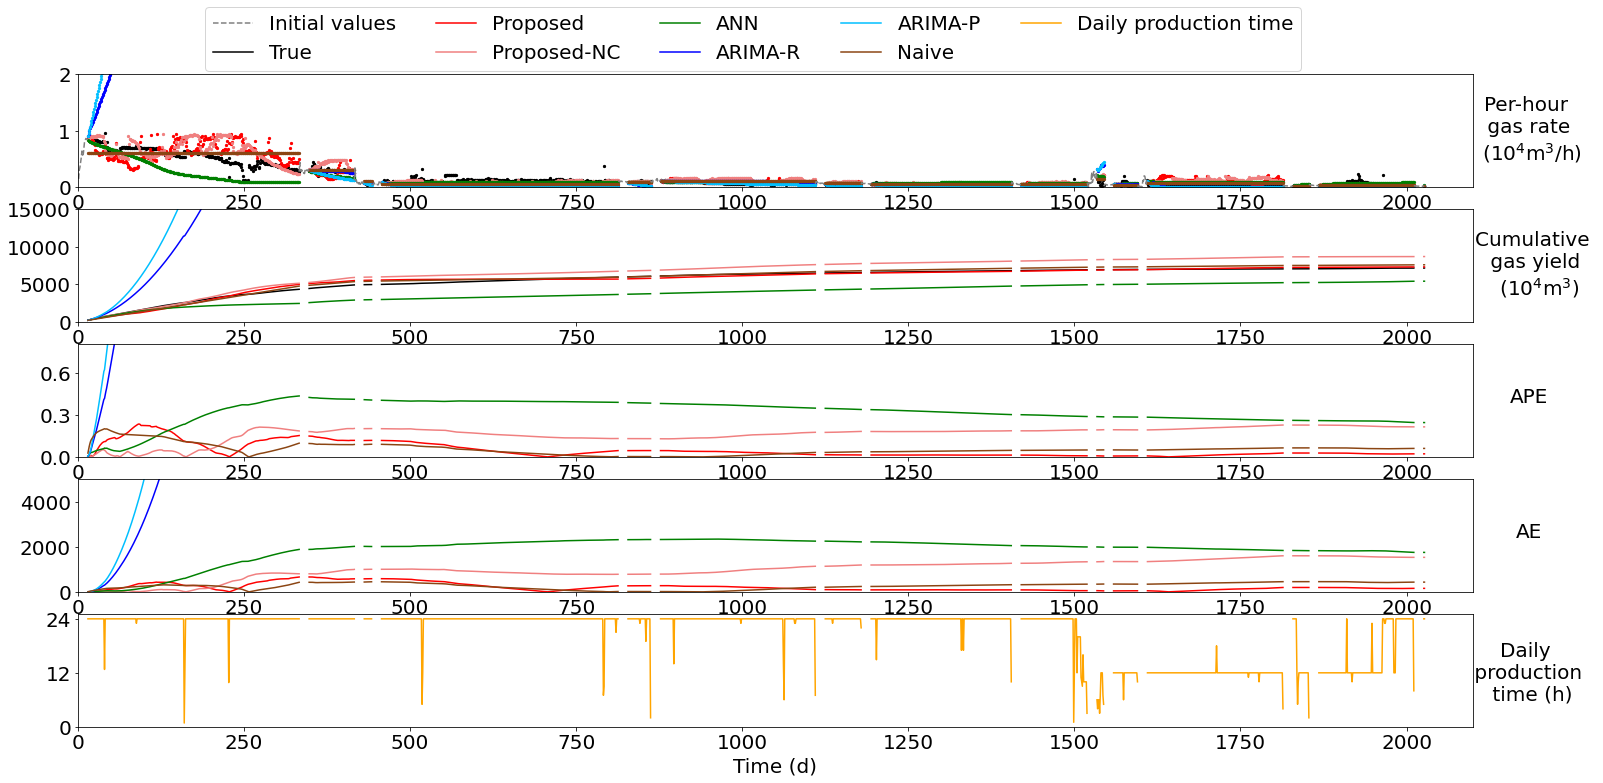

In [4]:
for rs in [178]:
    path_proposed = current_dir+'/Results/SA/'+str(rs)+'/'+str(rs)+'-ResultData-M200/'
    files_proposed = sorted(os.listdir(path_proposed))

    path_proposednc = current_dir+'/Results/ProposedNC/'+str(rs)+'-ResultData/'
    files_proposednc = sorted(os.listdir(path_proposednc))

    path_ann = current_dir+'/Results/ANN/'+str(rs)+'-ResultData/'
    files_ann = sorted(os.listdir(path_ann))

    path_arimar = current_dir+'/Results/ARIMAR/'+str(rs)+'-ResultData/'
    files_arimar = sorted(os.listdir(path_arimar))

    path_arimap = current_dir+'/Results/ARIMAP/'+str(rs)+'-ResultData/'
    files_arimap = sorted(os.listdir(path_arimap))

    path_naive = current_dir+'/Results/Naive/'+str(rs)+'-ResultData/'
    files_naive = sorted(os.listdir(path_naive))

    for i in [3]:
        df_proposed = pd.read_excel(path_proposed+files_proposed[i], header=0, sheet_name = 0)
        df_proposednc = pd.read_excel(path_proposednc+files_proposednc[i], header=0, sheet_name = 0)
        df_ann = pd.read_excel(path_ann+files_ann[i], header=0, sheet_name = 0)
        df_arimar = pd.read_excel(path_arimar+files_arimar[i], header=0, sheet_name = 0)
        df_arimap = pd.read_excel(path_arimap+files_arimap[i], header=0, sheet_name = 0)
        df_naive = pd.read_excel(path_naive+files_naive[i], header=0, sheet_name = 0)

        result_1 = pd.DataFrame()
        result_2 = pd.DataFrame()

        result_1['Mark'] = df_proposed['Mark']
        result_1['True1'] = df_proposed['True']
        result_1['Proposed1'] = df_proposed['Pred']
        result_1['ProposedNC1'] = df_proposednc['Pred']
        result_1['ANN1'] = df_ann['Pred']
        result_1['ARIMAR1'] = df_arimar['Pred']
        result_1['ARIMAP1'] = df_arimap['Pred']
        result_1['Naive1'] = df_naive['Pred']
        result_1['True2'] = df_proposed['TrueCumu']
        result_1['Proposed2'] = df_proposed['PredCumu']
        result_1['ProposedNC2'] = df_proposednc['PredCumu']
        result_1['ANN2'] = df_ann['PredCumu']
        result_1['ARIMAR2'] = df_arimar['PredCumu']
        result_1['ARIMAP2'] = df_arimap['PredCumu']
        result_1['Naive2'] = df_naive['PredCumu']
        result_1['Proposed3'] = abs(result_1['Proposed2']-result_1['True2'])/result_1['True2']
        result_1['ProposedNC3'] = abs(result_1['ProposedNC2']-result_1['True2'])/result_1['True2']
        result_1['ANN3'] = abs(result_1['ANN2']-result_1['True2'])/result_1['True2']
        result_1['ARIMAR3'] = abs(result_1['ARIMAR2']-result_1['True2'])/result_1['True2']
        result_1['ARIMAP3'] = abs(result_1['ARIMAP2']-result_1['True2'])/result_1['True2']
        result_1['Naive3'] = abs(result_1['Naive2']-result_1['True2'])/result_1['True2']
        result_1['Proposed4'] = abs(result_1['Proposed2']-result_1['True2'])
        result_1['ProposedNC4'] = abs(result_1['ProposedNC2']-result_1['True2'])
        result_1['ANN4'] = abs(result_1['ANN2']-result_1['True2'])
        result_1['ARIMAR4'] = abs(result_1['ARIMAR2']-result_1['True2'])
        result_1['ARIMAP4'] = abs(result_1['ARIMAP2']-result_1['True2'])
        result_1['Naive4'] = abs(result_1['Naive2']-result_1['True2'])
        result_1['t'] = df_proposed['t']
        result_1.loc[result_1['Mark']=='initial',['True1', 'Proposed1', 'ProposedNC1', 'ANN1', 'ARIMAR1', 'ARIMAP1', 'Naive1', 
                                                'True2', 'Proposed2', 'ProposedNC2', 'ANN2', 'ARIMAR2', 'ARIMAP2', 'Naive2', 
                                                'Proposed3', 'ProposedNC3', 'ANN3', 'ARIMAR3', 'ARIMAP3', 'Naive3', 
                                                'Proposed4', 'ProposedNC4', 'ANN4', 'ARIMAR4', 'ARIMAP4', 'Naive4', 't']] = np.nan

        result_2['Mark'] = df_proposed['Mark']
        result_2['True1'] = df_proposed['True']
        result_2['True2'] = df_proposed['TrueCumu']
        for j in range(1,len(result_2)-1):
            if (result_2['Mark'][j-1]=='forecast') and (result_2['Mark'][j+1]=='forecast'):
                result_2['True1'][j] = np.nan
                result_2['True2'][j] = np.nan

        fig, (ax0, ax1, ax2, ax3, ax4) = plt.subplots(5, 1, figsize=(25,12))
        ax0.scatter(result_1.index+1, result_1['True1'], s=5, color='black')
        ax0.plot(result_1.index+1, result_2['True1'], linestyle='--', label='Initial values', color='grey')
        ax0.scatter(result_1.index+1, result_1['Proposed1'], s=5, color='red')
        ax0.scatter(result_1.index+1, result_1['ProposedNC1'], s=5, color='lightcoral')
        ax0.scatter(result_1.index+1, result_1['ANN1'], s=5, color='green')
        ax0.scatter(result_1.index+1, result_1['ARIMAR1'], s=5, color='blue')
        ax0.scatter(result_1.index+1, result_1['ARIMAP1'], s=5, color='deepskyblue')
        ax0.scatter(result_1.index+1, result_1['Naive1'], s=5, color='saddlebrown')

        ax1.plot(result_1.index+1, result_1['True2'], label='True', color='black')
        ax1.plot(result_1.index+1, result_1['Proposed2'], label='Proposed', color='red')
        ax1.plot(result_1.index+1, result_1['ProposedNC2'], label='Proposed-NC', color='lightcoral')
        ax1.plot(result_1.index+1, result_1['ANN2'], label='ANN', color='green')
        ax1.plot(result_1.index+1, result_1['ARIMAR2'], label='ARIMA-R', color='blue')
        ax1.plot(result_1.index+1, result_1['ARIMAP2'], label='ARIMA-P', color='deepskyblue')
        ax1.plot(result_1.index+1, result_1['Naive2'], label='Naive', color='saddlebrown')

        ax2.plot(result_1.index+1, result_1['Proposed3'], color='red')
        ax2.plot(result_1.index+1, result_1['ProposedNC3'], color='lightcoral')
        ax2.plot(result_1.index+1, result_1['ANN3'], color='green')
        ax2.plot(result_1.index+1, result_1['ARIMAR3'], color='blue')
        ax2.plot(result_1.index+1, result_1['ARIMAP3'], color='deepskyblue')
        ax2.plot(result_1.index+1, result_1['Naive3'], color='saddlebrown')

        ax3.plot(result_1.index+1, result_1['Proposed4'], color='red')
        ax3.plot(result_1.index+1, result_1['ProposedNC4'], color='lightcoral')
        ax3.plot(result_1.index+1, result_1['ANN4'], color='green')
        ax3.plot(result_1.index+1, result_1['ARIMAR4'], color='blue')
        ax3.plot(result_1.index+1, result_1['ARIMAP4'], color='deepskyblue')
        ax3.plot(result_1.index+1, result_1['Naive4'], color='saddlebrown')

        ax4.plot(result_1.index+1, result_1['t'], label='Daily production time', color='orange')
        
        ax0.set_ylabel('Per-hour \n gas rate \n ($10^4$m$^3/$h)', fontsize=20, rotation=0)
        ax0.get_yaxis().set_label_coords(1.04,0.2)
        ax1.set_ylabel('Cumulative \n gas yield \n ($10^4$m$^3$)', fontsize=20, rotation=0)
        ax1.get_yaxis().set_label_coords(1.045,0.2)
        ax2.set_ylabel('APE', fontsize=20, rotation=0)
        ax2.get_yaxis().set_label_coords(1.04,0.45)
        ax3.set_ylabel('AE', fontsize=20, rotation=0)
        ax3.get_yaxis().set_label_coords(1.04,0.45)
        ax4.set_ylabel('Daily \n production \n time (h)', fontsize=20, rotation=0)
        ax4.get_yaxis().set_label_coords(1.04,0.2)
        ax4.set_xlabel('Time (d)', fontsize=20)

        length = 2100
        ax0.set_xlim(0,length)
        ax1.set_xlim(0,length)
        ax2.set_xlim(0,length)
        ax3.set_xlim(0,length)
        ax4.set_xlim(0,length)

        ax0.set_ylim(0,1)
        ax0.set_yticks((0, 1, 2))
        ax1.set_ylim(0,15000)
        ax1.set_yticks((0, 5000, 10000, 15000))
        ax2.set_ylim(0,0.8)
        ax2.set_yticks((0, 0.3, 0.6))
        ax3.set_ylim(0,5000)
        ax3.set_yticks((0, 2000, 4000))
        ax4.set_ylim(0,25)
        ax4.set_yticks((0, 12, 24))

        ax0.tick_params(labelsize=20)
        ax1.tick_params(labelsize=20)
        ax2.tick_params(labelsize=20)
        ax3.tick_params(labelsize=20)
        ax4.tick_params(labelsize=20)

        fig.legend(loc='upper center', bbox_to_anchor=(0.5, 0.97), ncol=5, fontsize=20)

        plt.savefig(current_dir+'/Figures/Figure_7.png', bbox_inches='tight')